In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. Leer el dataframe.

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')

2. Entender el estado de los datos

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [101]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [102]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [103]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas `["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]`, determinar el promedio de cada una de las columnas asociado a cada elementos unico de `ocean_proximity`.

In [104]:
cols = ["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value"]
df[cols].groupby(df['ocean_proximity']).mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna.

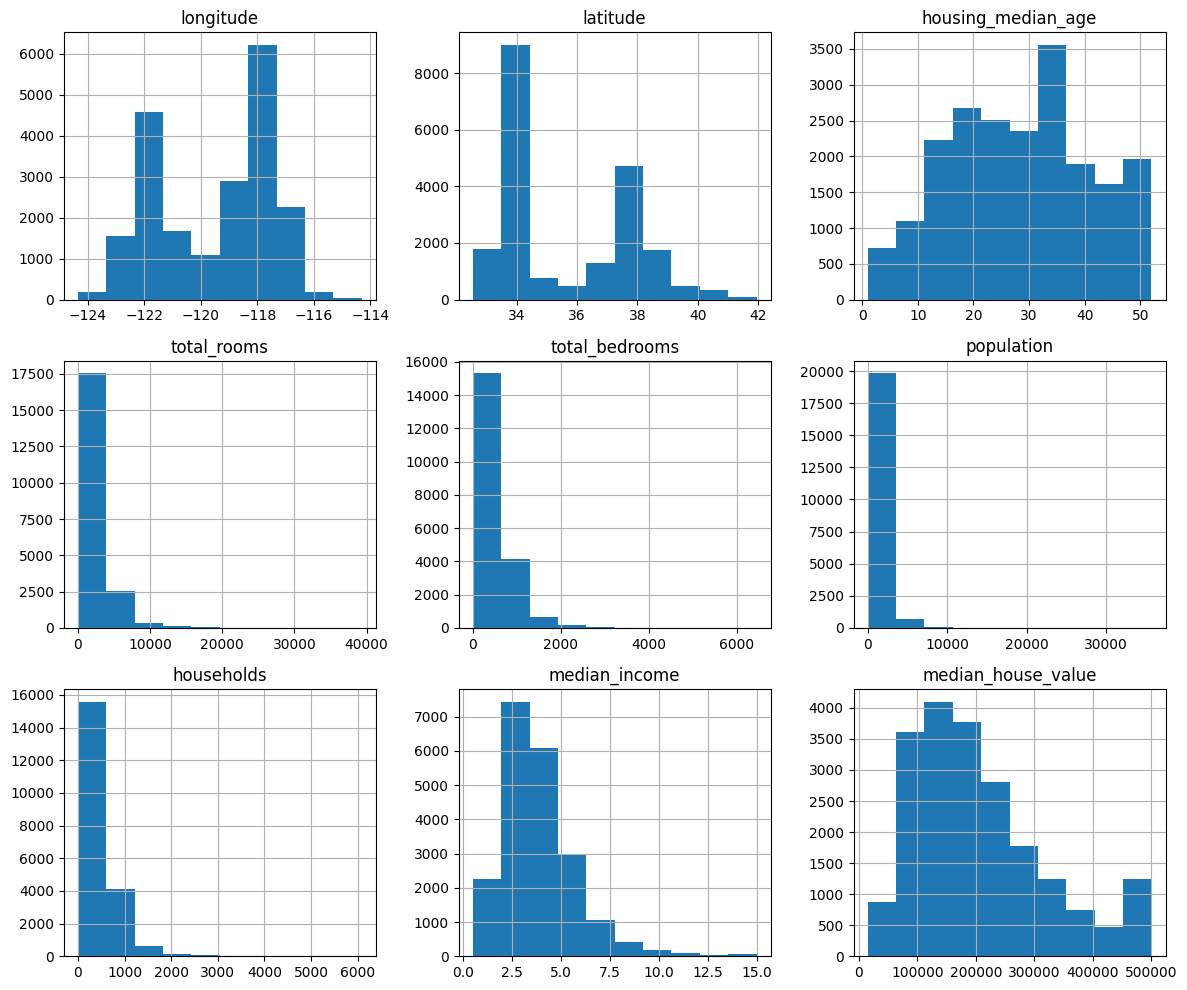

In [105]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

6. (No hay punto 6.)

7. Empleando el siguiente código realiza el gráfico boxplot

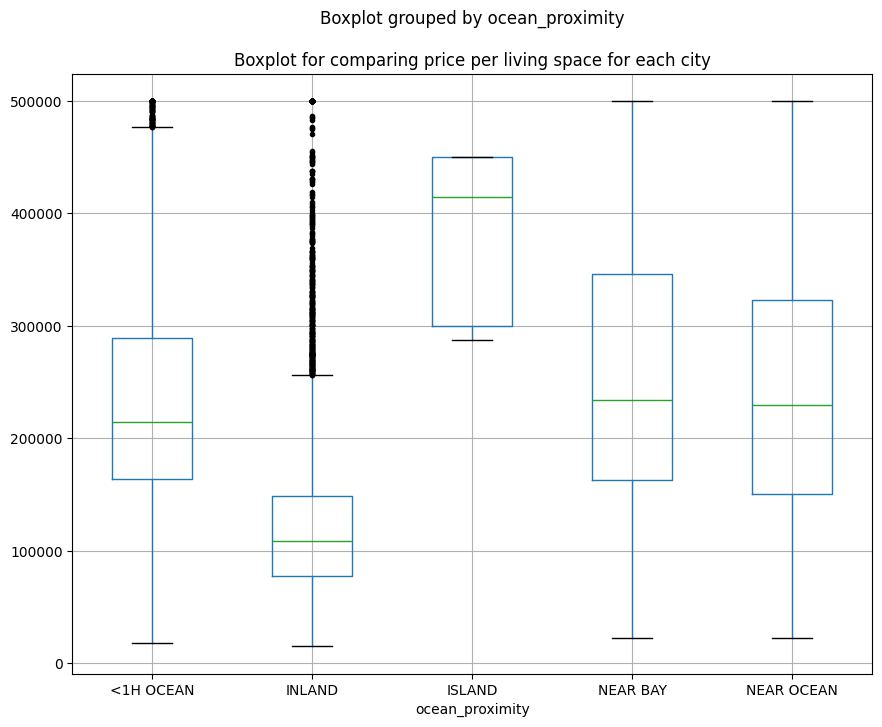

In [106]:
# draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym ='k.', figsize=(10,8))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matriz de correlación.

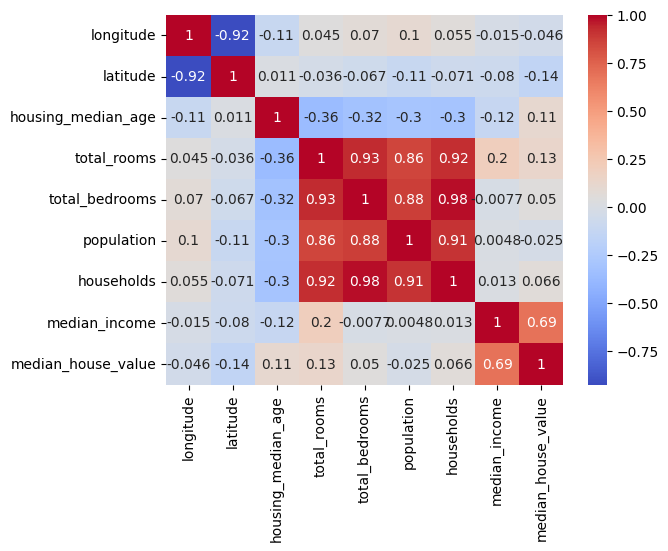

In [107]:
data = df.corr(numeric_only=True)
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.show()

9. con las columnas `"median_house_value", "median_income", "total_rooms","housing_median_age"` realiza un grafico pairplot empleando seaborn de python.

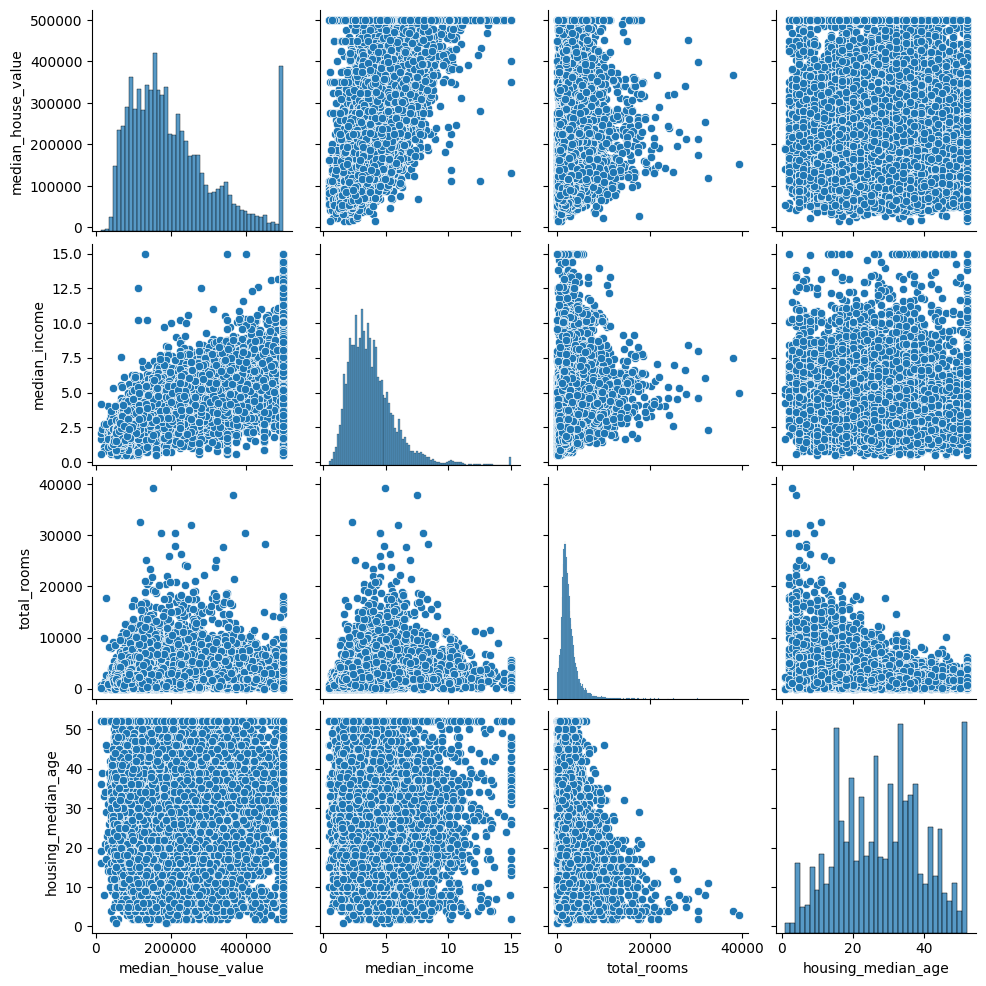

In [108]:
sns.pairplot(df[["median_house_value", "median_income", "total_rooms","housing_median_age"]])
plt.show()

10. Realiza un scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna median_house_value.

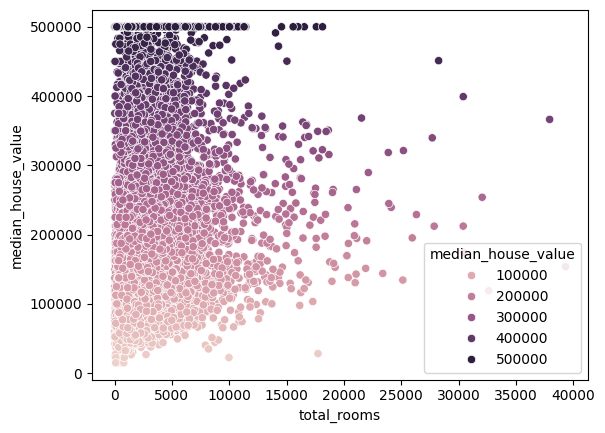

In [109]:
sns.scatterplot(data=df, x='total_rooms', y='median_house_value', hue='median_house_value')
plt.show()

11. ¿Las siguientes lineas son adecuadas para separar el dataframe en datos de entrenamiento de test?, ¿qué pasa en la división de los datos?

In [110]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


**Respuestas:**

* `train_test_split()` divide aleatoriamente las filas del dataframe en dos con juntos `train_set` y `test_set`. El parámetro `test_size=0.2` indica que el 20% de los datos se asignarán al conjunto de prueba, y el 80% restante al conjunto de entrenamiento. `random_state=42` asegura que la división sea la misma cada vez que ejecutas el código.

* La división que hace `train_test_split()` es aleatoria, pero como se dijo, esto no garantiza que ambos conjuntos de entrenamiennto y prueba tengan la misma distribución de características importantes que el dataframe original. Es decir, si hay una caracteística que es elemental para el modelo, una división aleatoria podría resultar en que un conjunto tenga una proporción muy diferente de ciertos valores en comparación con el otro, esto podría llevar a un modelo sesgado.

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df.income_cat.hist()
```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```

Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

**Solución:**

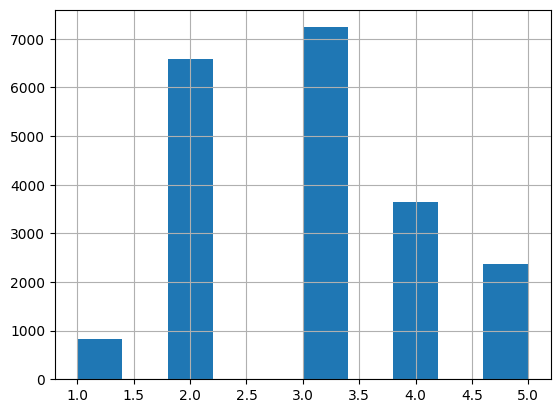

In [111]:
df["income_cat"] = pd.cut(df["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

df.income_cat.hist()
plt.show()

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [113]:
print("Proporciones en el DataFrame original:")
display(df["income_cat"].value_counts() / len(df))

print("\nProporciones en el conjunto de entrenamiento estratificado:")
display(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

print("\nProporciones en el conjunto de prueba estratificado:")
display(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

Proporciones en el DataFrame original:


,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826



Proporciones en el conjunto de entrenamiento estratificado:


,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789



Proporciones en el conjunto de prueba estratificado:


,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [114]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 7)

print("Proporciones en el conjunto de entrenamiento aleatorio:")
train_set["income_cat"].value_counts() / len(train_set)

Proporciones en el conjunto de entrenamiento aleatorio:


,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


In [115]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

print("Comparación de proporciones:")
compare_props

Comparación de proporciones:


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


Se puede observar de la tabla de comparación de proporciones que muestra lo siguiente:

* **Overall:** Muestra las proporciones de cada categoría de ingreso en el DataFrame original.

* **Stratified:** Muestra las proporciones de cada categoría de ingreso en el conjunto de prueba después de realizar la división estratificada.

* **Random:** Muestra las proporciones de cada categoría de ingreso en el conjunto de prueba después de realizar una división aleatoria simple.

* **Rand. %error:** Muestra el porcentaje de error entre la proporción de cada categoría en el conjunto aleatorio y el DataFrame original.

* **Strat. %error:** Muestra el porcentaje de error entre la proporción de cada categoría en el conjunto estratificado y el DataFrame original.

Las lineas que se dieron muestran que la división estratificada de `StratifiesShuffleSplit()` es más efectiva que la división aleatoria simple de `train_test_split()` para mantener la representatividad de la distribución de la variable `income_cat` en los conjuntos de entrenamiento de prueba.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:

```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

In [116]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_room"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_household"]=strat_train_set["population"]/strat_train_set["households"]

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python
df.isnull().sum()

#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)

q.isnull().sum()
```

## imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:

```python
imp_mean.statistics_
df_train_num.median()
```

```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

**Solución:**

In [117]:
from sklearn.impute import SimpleImputer

df_train_num = strat_train_set.drop("ocean_proximity", axis=1)

imp_median = SimpleImputer(strategy='median')

# Ajusta el imputer a los datos de entrenamiento numéricos
imp_median.fit(df_train_num)

SimpleImputer(strategy='median')

Se comparan las siguientes variables pedidas:

In [118]:
print("Medianas calculadas por SimpleImputer:")
display(imp_median.statistics_)

print("\nMedianas calculadas directamente del DataFrame:")
# Excluyo la columna 'income_cat' porque me genera un error
display(df_train_num.drop('income_cat', axis=1).median())

Medianas calculadas por SimpleImputer:


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  3.00000000e+00,  5.23234164e+00,  2.03027043e-01,
        2.81766108e+00])


Medianas calculadas directamente del DataFrame:


,0
longitude,-118.510000
latitude,34.260000
housing_median_age,29.000000
total_rooms,2119.000000
total_bedrooms,433.000000
population,1164.000000
households,408.000000
median_income,3.541550
median_house_value,179500.000000
rooms_per_household,5.232342


Se constuye la matriz de características:

In [119]:
X = imp_median.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns, index=df_train_num.index)

print("Matriz de características imputada (primeras filas):")
display(housing_tr.head())

Matriz de características imputada (primeras filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241


# Manejo de texto y atributos categóricos

15.  ¿Qué realizan las siguientes lineas de código?

```python
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```

In [120]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = strat_train_set[["ocean_proximity"]]

cat_encoder = OneHotEncoder(sparse_output=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print("Datos categóricos codificados (primeras filas):")
print(housing_cat_1hot[:5])

print("\nCategorías aprendidas por el codificador:")
print(cat_encoder.categories_)

Datos categóricos codificados (primeras filas):
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]

Categorías aprendidas por el codificador:
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [121]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0], index=strat_train_set.index)

housing_tr_ = housing_tr.join(df_cat_1hot)

print("\nDataFrame final con características numéricas imputadas y categóricas codificadas (primeras filas):")
display(housing_tr_.head())


DataFrame final con características numéricas imputadas y categóricas codificadas (primeras filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241,1.0,0.0,0.0,0.0,0.0


**Respuesta:**

* Se importa `OneHotEncoder` que se utiliza para convertir variables categóricas en una representación numérica de "one-hot".

* `df_train["ocean_proximity"].unique()`: esta linea muestra los valores únicos presentes en la columna `ocean_proximity` del conjunto de entrenamiento.

* `housing_cat=df_train[["ocean_proximity"]]`: Crea un nuevo dataframe llamado `housing_cat` que contiene solo la columna `ocean_proximity` del conjunto de entrenamiento. Se usa doble corchete `[[...]]` para asegurarse de que el resultado sea un dataframe y no una Serie, ya que `OneHotEncoder` espera un input con formato de dataframe o array 2D.

* `cat_encoder = OneHotEncoder(sparse_output=False)`: Inicializa un objeto `OneHotEncoder`. El parámetro `sparse_output=False` indica que la salida debe ser una matriz densa de NumPy en lugar de una matriz dispersa.

* `housing_cat_1hot = cat_encoder.fit_transform(housing_cat)`: aquí el codificador aprende las categorías únicas de la columna `ocean_proximity` y se convierte la columna categórica en unna representación one-hot. Por cada fila, se crea un vector donde solo la columna correspondiente a la categoría de esa fila tiene el valor 1, y el resto son 0.

* `df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0], index=strat_train_set.index)`: Convierte la matriz NumPy `housing_cat_1hot` en un dataframe de pandas. Los nombres de las columnas se toman de las categorías aprendidas por el codificador `cat_encoder.categories_[0]`, y se usa el índice del `strat_train_set` original para mantener la correspondencia de filas.

* `housing_tr_ = housing_tr.join(df_cat_1hot)`: Une el dataframe numérico imputado `housing_tr` con el nuevo dataframe que contiene la representación one-hot de la columna categórica `df_cat_1hot`. La unión se realiza utilizando el índice de las filas, asegurando que las características numéricas y las nuevas características one-hot correspondan a la misma instancia.

# Escalamiento de varibales

16. Las variables pueden ser escaladas como sigue:

In [122]:
cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",\
      "total_bedrooms", "population",   "households",   "median_income",\
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]

housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

Se separan características y etiquetas:

In [123]:
housing_train_labels = strat_train_set["median_house_value"].copy()
housing_train_features = strat_train_set.drop("median_house_value", axis=1)

housing_test_labels = strat_test_set["median_house_value"].copy()
housing_test_features = strat_test_set.drop("median_house_value", axis=1)

print("Primeras filas del conjunto de características de entrenamiento:")
display(housing_train_features.head())

print("\nPrimeras filas del conjunto de etiquetas de entrenamiento:")
display(housing_train_labels.head())

Primeras filas del conjunto de características de entrenamiento:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,0.182692,3.167241



Primeras filas del conjunto de etiquetas de entrenamiento:


,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0


Se manejan las variables numéricas (imputación y escalado):

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

original_numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                         'total_bedrooms', 'population', 'households', 'median_income']

housing_train_num = strat_train_set[original_numeric_cols]

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_train_num)
housing_train_num_imputed = imputer.transform(housing_train_num)

scaler = MinMaxScaler()
scaler.fit(housing_train_num_imputed)
housing_train_num_scaled_array = scaler.transform(housing_train_num_imputed)

housing_train_num_scaled = pd.DataFrame(housing_train_num_scaled_array, columns=original_numeric_cols, index=housing_train_num.index)


housing_test_num = strat_test_set[original_numeric_cols]

housing_test_num_imputed = imputer.transform(housing_test_num)

housing_test_num_scaled_array = scaler.transform(housing_test_num_imputed)

housing_test_num_scaled = pd.DataFrame(housing_test_num_scaled_array, columns=original_numeric_cols, index=housing_test_num.index)

print("Datos de entrenamiento numéricos escalados:")
display(housing_train_num_scaled.head())

print("\nDatos numéricos de prueba escalados")
display(housing_test_num_scaled.head())

Datos de entrenamiento numéricos escalados:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617



Datos numéricos de prueba escalados


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5241,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662
17352,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030
3505,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858
7777,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094
14155,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720


Se manejan las variables categóricas (one-hot encoding):


In [125]:
cat_encoder = OneHotEncoder(sparse_output=False)

housing_cat_train = strat_train_set[["ocean_proximity"]]
cat_encoder.fit(housing_cat_train)

housing_train_cat_encoded_array = cat_encoder.transform(housing_cat_train)

housing_cat_test = strat_test_set[["ocean_proximity"]]
housing_test_cat_encoded_array = cat_encoder.transform(housing_cat_test)

housing_train_cat_encoded = pd.DataFrame(housing_train_cat_encoded_array,
                                         columns=cat_encoder.categories_[0],
                                         index=housing_train_features.index)

housing_test_cat_encoded = pd.DataFrame(housing_test_cat_encoded_array,
                                        columns=cat_encoder.categories_[0],
                                        index=housing_test_features.index)


print("Datos de entrenamiento categóricos codificados:")
display(housing_train_cat_encoded.head())

print("\nDatos de prueba categóricos codificados:")
display(housing_test_cat_encoded.head())

Datos de entrenamiento categóricos codificados:


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0



Datos de prueba categóricos codificados:


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,1.0,0.0,0.0,0.0,0.0
17352,1.0,0.0,0.0,0.0,0.0
3505,1.0,0.0,0.0,0.0,0.0
7777,1.0,0.0,0.0,0.0,0.0
14155,0.0,0.0,0.0,0.0,1.0


Se combinan características numéricas y categóricas.

In [126]:
housing_train_features = housing_train_num_scaled.join(housing_train_cat_encoded)

housing_test_features = housing_test_num_scaled.join(housing_test_cat_encoded)

print("Características de entrenamiento (primeras 5 filas):")
display(housing_train_features.head())

print("\nCaracterísticas de prueba (primeras 5 filas):")
display(housing_test_features.head())

Características de entrenamiento (primeras 5 filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0



Características de prueba (primeras 5 filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5241,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.0,0.0,0.0,0.0,0.0
17352,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,1.0,0.0,0.0,0.0,0.0
3505,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,1.0,0.0,0.0,0.0,0.0
7777,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,1.0,0.0,0.0,0.0,0.0
14155,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.0,0.0,0.0,0.0,1.0


Se crean los dataframes finales.


In [127]:
housing_train = housing_train_features.join(housing_train_labels)

housing_test = housing_test_features.join(housing_test_labels)

print("Training DataFrame (first 5 filas):")
display(housing_train.head())

print("\nTest DataFrame (primeras 5 filas):")
display(housing_test.head())

Training DataFrame (first 5 filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,1.0,0.0,0.0,0.0,72100.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,0.0,1.0,279600.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,1.0,0.0,0.0,0.0,82700.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,0.0,1.0,112500.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,1.0,0.0,0.0,0.0,0.0,238300.0



Test DataFrame (primeras 5 filas):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
5241,0.593625,0.167906,0.549020,0.163835,0.162693,0.061128,0.178865,0.536662,1.0,0.0,0.0,0.0,0.0,500001.0
17352,0.391434,0.249734,0.450980,0.051229,0.049130,0.023880,0.052465,0.311030,1.0,0.0,0.0,0.0,0.0,162500.0
3505,0.587649,0.181722,0.686275,0.036806,0.043170,0.022562,0.050971,0.267858,1.0,0.0,0.0,0.0,0.0,204600.0
7777,0.622510,0.145590,0.666667,0.041893,0.052030,0.029962,0.055825,0.191094,1.0,0.0,0.0,0.0,0.0,159700.0
14155,0.725100,0.024442,0.725490,0.095971,0.098582,0.041817,0.114264,0.265720,0.0,0.0,0.0,0.0,1.0,184000.0


18. ¿que puede concluir respecto al modelo empleado?

Hasta ahora se han prepadado los datos de una forma cuidadosa, asegurando que el dataset esté limpio y transformado y dividido de una manera adecuada para la fasee de entrenamiento de cualquier modelo predictivo que se desee utilizar.

19. ¿El modelo de regresión lineal es valido para lo construido?

Sí, es válido ya quee los datos están preparados y limpios, lo que es un paso para poder construir y validar un modelo de regresión lineal como sigue:

In [128]:
lin_reg = LinearRegression()
lin_reg.fit(housing_train_features, housing_train_labels)

LinearRegression()

se realizan predicciones sobre el conjunto de entrenamiento para ver qué tan bien se ajusta

In [129]:
housing_predictions_train = lin_reg.predict(housing_train_features)
mse_train = mean_squared_error(housing_train_labels, housing_predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"RMSE en el conjunto de entrenamiento: {rmse_train}")

RMSE en el conjunto de entrenamiento: 69050.56219504567


se evalúa el modelo en el conjunto de prueba

In [130]:
housing_predictions_test = lin_reg.predict(housing_test_features)
mse_test = mean_squared_error(housing_test_labels, housing_predictions_test)
rmse_test = np.sqrt(mse_test)

print(f"RMSE en el conjunto de prueba: {rmse_test}")

RMSE en el conjunto de prueba: 67346.87995764881


se calcula el score en el conjunto de prueba

In [131]:
score = lin_reg.score(housing_test_features, housing_test_labels)

print(f"Score en el conjunto de prueba: {score}")

Score en el conjunto de prueba: 0.6519949368926147


20. ¿qué informacion nos da el score?

El score proporciona iformación sobre la proporción de la varianza en la variable dependiente que en este caso sería `median_house_value` que es predecible a partir de variables indeependiente, que en este caso son las características.

21. ¿Puede ser ajustado a otro modelo?

Sí, ya que la preparación de los datos que se realizó es general, no está ligada a un modelo en específico. Se podrían probar modelos que capturen relaciones no lineales, por ejemplo random forest.

22. ¿Como puede autmatizar todo el proceso empleando pipelines?

Esto se podría hacer definiendo los nombres de las columnas numéricas y categóricas que se procesarán. Luego se crea un pipeline para las transformaciones numéricas, y un pipeline para las características categóricas. Después se combinan esos pipelines usando `ColumnTransformer` de `sklearn`. Finalmente se crea el pipeline completo que incluye el procesador y el modelo a usar.